In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression



import math


In [2]:
data=pd.read_csv(r"C:\Users\DHARM\Desktop\sem1\DM_Project\Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")

In [3]:
data

,Unnamed: 0,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Asian,RACE,RACEASN
53388,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Hawaiian/Pacific Islander,RACE,RACEHPI
53389,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
53390,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,2 or more races,RACE,RACE2PLUS


In [4]:
missing_value = data.isnull().sum()
missing_value

Unnamed: 0                        0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit               53392
Data_Value_Type                   0
Data_Value                     5046
Data_Value_Alt                 5046
Data_Value_Footnote_Symbol    48346
Data_Value_Footnote           48346
Low_Confidence_Limit           5046
High_Confidence_Limit          5046
Sample_Size                    5046
Total                         51485
Age(years)                    41954
Education                     45764
Gender                        49578
Income                        40043
Race/Ethnicity                38136
GeoLocation                    1008
ClassID                           0
TopicID                           0
QuestionID                        0
DataValueTypeID             

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [6]:
col = ['Unnamed: 0','LocationAbbr','Class','Data_Value_Unit','Data_Value_Type','ClassID']
data.drop(columns = col, inplace = True)

In [7]:
data

,YearEnd,LocationDesc,Datasource,Topic,Question,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,...,Race/Ethnicity,GeoLocation,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,32.0,NaN,NaN,30.5,...,NaN,"(32.84057112200048, -86.63186076199969)",OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,32.3,NaN,NaN,29.9,...,NaN,"(32.84057112200048, -86.63186076199969)",OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,31.8,NaN,NaN,30.0,...,NaN,"(32.84057112200048, -86.63186076199969)",OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,33.6,NaN,NaN,29.9,...,NaN,"(32.84057112200048, -86.63186076199969)",OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,32.8,NaN,NaN,30.2,...,NaN,"(32.84057112200048, -86.63186076199969)",OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2016,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,NaN,~,Data not available because sample size is insu...,NaN,...,Asian,"(18.335765, -64.896335)",PA1,Q047,VALUE,78,Race/Ethnicity,Asian,RACE,RACEASN
53388,2016,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,NaN,~,Data not available because sample size is insu...,NaN,...,Hawaiian/Pacific Islander,"(18.335765, -64.896335)",PA1,Q047,VALUE,78,Race/Ethnicity,Hawaiian/Pacific Islander,RACE,RACEHPI
53389,2016,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,NaN,~,Data not available because sample size is insu...,NaN,...,American Indian/Alaska Native,"(18.335765, -64.896335)",PA1,Q047,VALUE,78,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
53390,2016,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,NaN,~,Data not available because sample size is insu...,NaN,...,2 or more races,"(18.335765, -64.896335)",PA1,Q047,VALUE,78,Race/Ethnicity,2 or more races,RACE,RACE2PLUS


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearEnd                     53392 non-null  int64  
 1   LocationDesc                53392 non-null  object 
 2   Datasource                  53392 non-null  object 
 3   Topic                       53392 non-null  object 
 4   Question                    53392 non-null  object 
 5   Data_Value                  48346 non-null  float64
 6   Data_Value_Alt              48346 non-null  float64
 7   Data_Value_Footnote_Symbol  5046 non-null   object 
 8   Data_Value_Footnote         5046 non-null   object 
 9   Low_Confidence_Limit        48346 non-null  float64
 10  High_Confidence_Limit       48346 non-null  float64
 11  Sample_Size                 48346 non-null  float64
 12  Total                       1907 non-null   object 
 13  Age(years)                  114

In [9]:
col=['Data_Value_Footnote_Symbol','Data_Value_Footnote','DataValueTypeID','GeoLocation']
data.drop(columns = col, inplace = True)

In [10]:
data

,YearEnd,LocationDesc,Datasource,Topic,Question,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,...,Gender,Income,Race/Ethnicity,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,32.0,30.5,33.5,7304.0,...,NaN,NaN,NaN,OWS1,Q036,1,Total,Total,OVR,OVERALL
1,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,32.3,29.9,34.7,2581.0,...,Male,NaN,NaN,OWS1,Q036,1,Gender,Male,GEN,MALE
2,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,31.8,30.0,33.6,4723.0,...,Female,NaN,NaN,OWS1,Q036,1,Gender,Female,GEN,FEMALE
3,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,33.6,29.9,37.6,1153.0,...,NaN,NaN,NaN,OWS1,Q036,1,Education,Less than high school,EDU,EDUHS
4,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,32.8,30.2,35.6,2402.0,...,NaN,NaN,NaN,OWS1,Q036,1,Education,High school graduate,EDU,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2016,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Asian,PA1,Q047,78,Race/Ethnicity,Asian,RACE,RACEASN
53388,2016,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Hawaiian/Pacific Islander,PA1,Q047,78,Race/Ethnicity,Hawaiian/Pacific Islander,RACE,RACEHPI
53389,2016,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,American Indian/Alaska Native,PA1,Q047,78,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
53390,2016,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2 or more races,PA1,Q047,78,Race/Ethnicity,2 or more races,RACE,RACE2PLUS


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearEnd                    53392 non-null  int64  
 1   LocationDesc               53392 non-null  object 
 2   Datasource                 53392 non-null  object 
 3   Topic                      53392 non-null  object 
 4   Question                   53392 non-null  object 
 5   Data_Value                 48346 non-null  float64
 6   Data_Value_Alt             48346 non-null  float64
 7   Low_Confidence_Limit       48346 non-null  float64
 8   High_Confidence_Limit      48346 non-null  float64
 9   Sample_Size                48346 non-null  float64
 10  Total                      1907 non-null   object 
 11  Age(years)                 11438 non-null  object 
 12  Education                  7628 non-null   object 
 13  Gender                     3814 non-null   obj

In [12]:
col=['QuestionID','LocationID','StratificationCategory1','Stratification1','StratificationCategoryId1','StratificationID1']
data.drop(columns=col,inplace = True)

In [13]:
data

,YearEnd,LocationDesc,Datasource,Topic,Question,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,TopicID
0,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,32.0,30.5,33.5,7304.0,Total,NaN,NaN,NaN,NaN,NaN,OWS1
1,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,32.3,29.9,34.7,2581.0,NaN,NaN,NaN,Male,NaN,NaN,OWS1
2,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,31.8,30.0,33.6,4723.0,NaN,NaN,NaN,Female,NaN,NaN,OWS1
3,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,33.6,29.9,37.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,OWS1
4,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,32.8,30.2,35.6,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN,OWS1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2016,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asian,PA1
53388,2016,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hawaiian/Pacific Islander,PA1
53389,2016,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Indian/Alaska Native,PA1
53390,2016,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 or more races,PA1


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YearEnd                 53392 non-null  int64  
 1   LocationDesc            53392 non-null  object 
 2   Datasource              53392 non-null  object 
 3   Topic                   53392 non-null  object 
 4   Question                53392 non-null  object 
 5   Data_Value              48346 non-null  float64
 6   Data_Value_Alt          48346 non-null  float64
 7   Low_Confidence_Limit    48346 non-null  float64
 8   High_Confidence_Limit   48346 non-null  float64
 9   Sample_Size             48346 non-null  float64
 10  Total                   1907 non-null   object 
 11  Age(years)              11438 non-null  object 
 12  Education               7628 non-null   object 
 13  Gender                  3814 non-null   object 
 14  Income                  13349 non-null

In [15]:
col=['Total','TopicID']
data.drop(columns=col,inplace=True)

In [16]:
data

,YearEnd,LocationDesc,Datasource,Topic,Question,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Gender,Income,Race/Ethnicity
0,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,32.0,30.5,33.5,7304.0,NaN,NaN,NaN,NaN,NaN
1,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,32.3,29.9,34.7,2581.0,NaN,NaN,Male,NaN,NaN
2,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,31.8,30.0,33.6,4723.0,NaN,NaN,Female,NaN,NaN
3,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,33.6,29.9,37.6,1153.0,NaN,Less than high school,NaN,NaN,NaN
4,2011,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,32.8,30.2,35.6,2402.0,NaN,High school graduate,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2016,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asian
53388,2016,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hawaiian/Pacific Islander
53389,2016,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Indian/Alaska Native
53390,2016,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 or more races


In [17]:
col=['Datasource','Data_Value_Alt']
data.drop(columns=col,inplace=True)

In [18]:
data

,YearEnd,LocationDesc,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Gender,Income,Race/Ethnicity
0,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,30.5,33.5,7304.0,NaN,NaN,NaN,NaN,NaN
1,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,29.9,34.7,2581.0,NaN,NaN,Male,NaN,NaN
2,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,30.0,33.6,4723.0,NaN,NaN,Female,NaN,NaN
3,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,29.9,37.6,1153.0,NaN,Less than high school,NaN,NaN,NaN
4,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,30.2,35.6,2402.0,NaN,High school graduate,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2016,Virgin Islands,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asian
53388,2016,Virgin Islands,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hawaiian/Pacific Islander
53389,2016,Virgin Islands,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Indian/Alaska Native
53390,2016,Virgin Islands,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 or more races


In [19]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YearEnd                 53392 non-null  int64  
 1   LocationDesc            53392 non-null  object 
 2   Topic                   53392 non-null  object 
 3   Question                53392 non-null  object 
 4   Data_Value              48346 non-null  float64
 5   Low_Confidence_Limit    48346 non-null  float64
 6   High_Confidence_Limit   48346 non-null  float64
 7   Sample_Size             48346 non-null  float64
 8   Age(years)              11438 non-null  object 
 9   Education               7628 non-null   object 
 10  Gender                  3814 non-null   object 
 11  Income                  13349 non-null  object 
 12  Race/Ethnicity          15256 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 5.3+ MB


In [20]:
x= data.Question.value_counts()

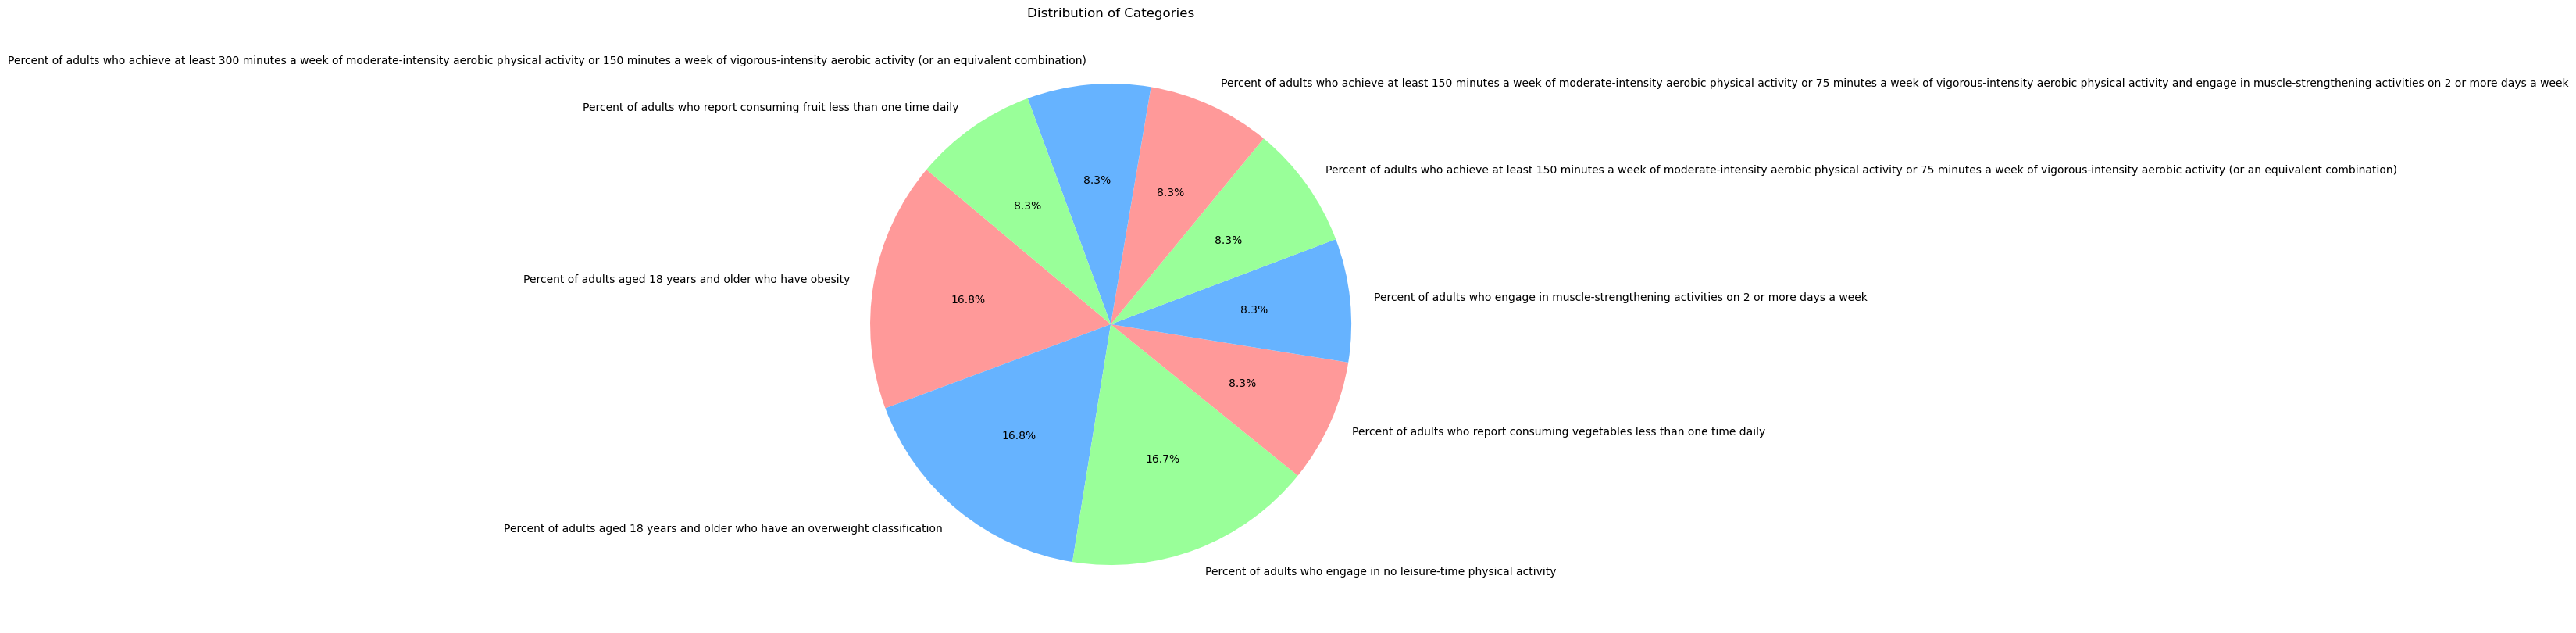

In [21]:
plt.figure(figsize=(20, 10))
plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Categories')
plt.show()


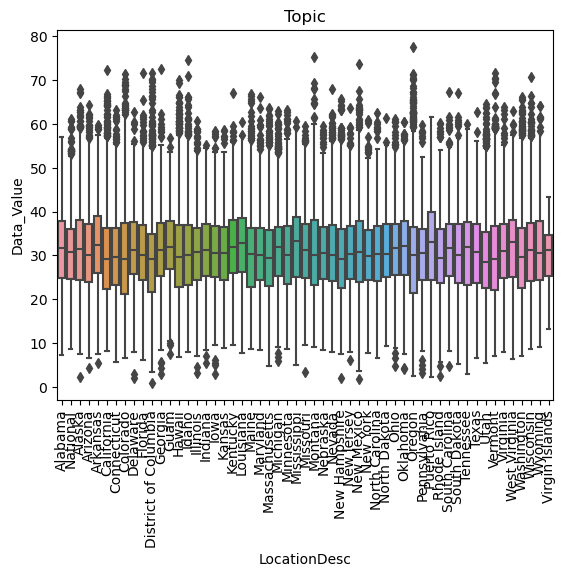

In [22]:

sns.boxplot(x="LocationDesc", y="Data_Value", data=data) 
plt.xlabel("LocationDesc")
plt.ylabel("Data_Value")
plt.title("Topic")
plt.xticks(rotation=90)
plt.show()

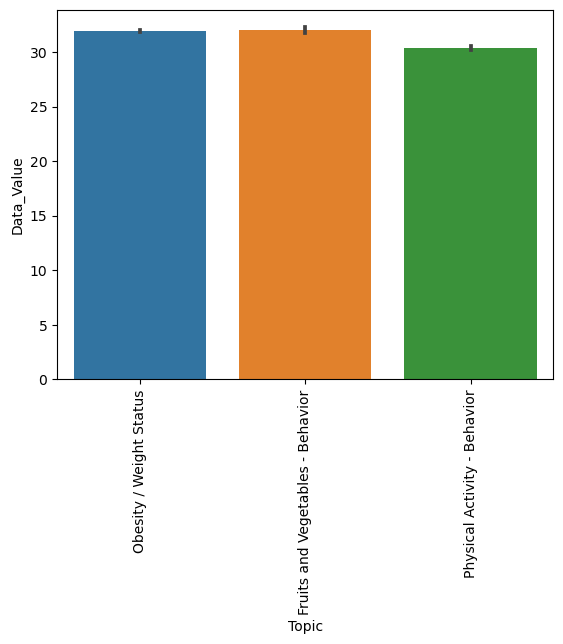

In [23]:
sns.barplot(x='Topic', y='Data_Value', data=data)
plt.xticks(rotation=90)
plt.show()

In [24]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YearEnd                 53392 non-null  int64  
 1   LocationDesc            53392 non-null  object 
 2   Topic                   53392 non-null  object 
 3   Question                53392 non-null  object 
 4   Data_Value              48346 non-null  float64
 5   Low_Confidence_Limit    48346 non-null  float64
 6   High_Confidence_Limit   48346 non-null  float64
 7   Sample_Size             48346 non-null  float64
 8   Age(years)              11438 non-null  object 
 9   Education               7628 non-null   object 
 10  Gender                  3814 non-null   object 
 11  Income                  13349 non-null  object 
 12  Race/Ethnicity          15256 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 5.3+ MB


In [25]:
 data['Topic'].value_counts()


Physical Activity - Behavior        26628
Obesity / Weight Status             17920
Fruits and Vegetables - Behavior     8844
Name: Topic, dtype: int64

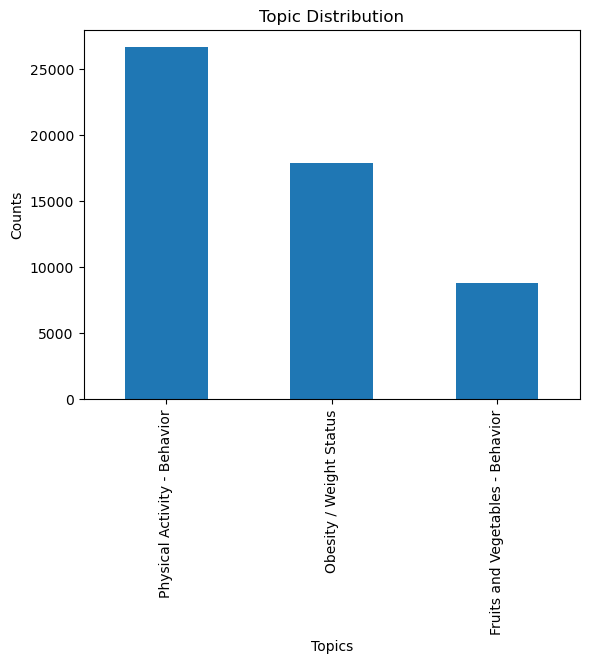

In [26]:
data['Topic'].value_counts().plot(kind='bar')
plt.xlabel('Topics')
plt.ylabel('Counts')
plt.title('Topic Distribution')
plt.show()

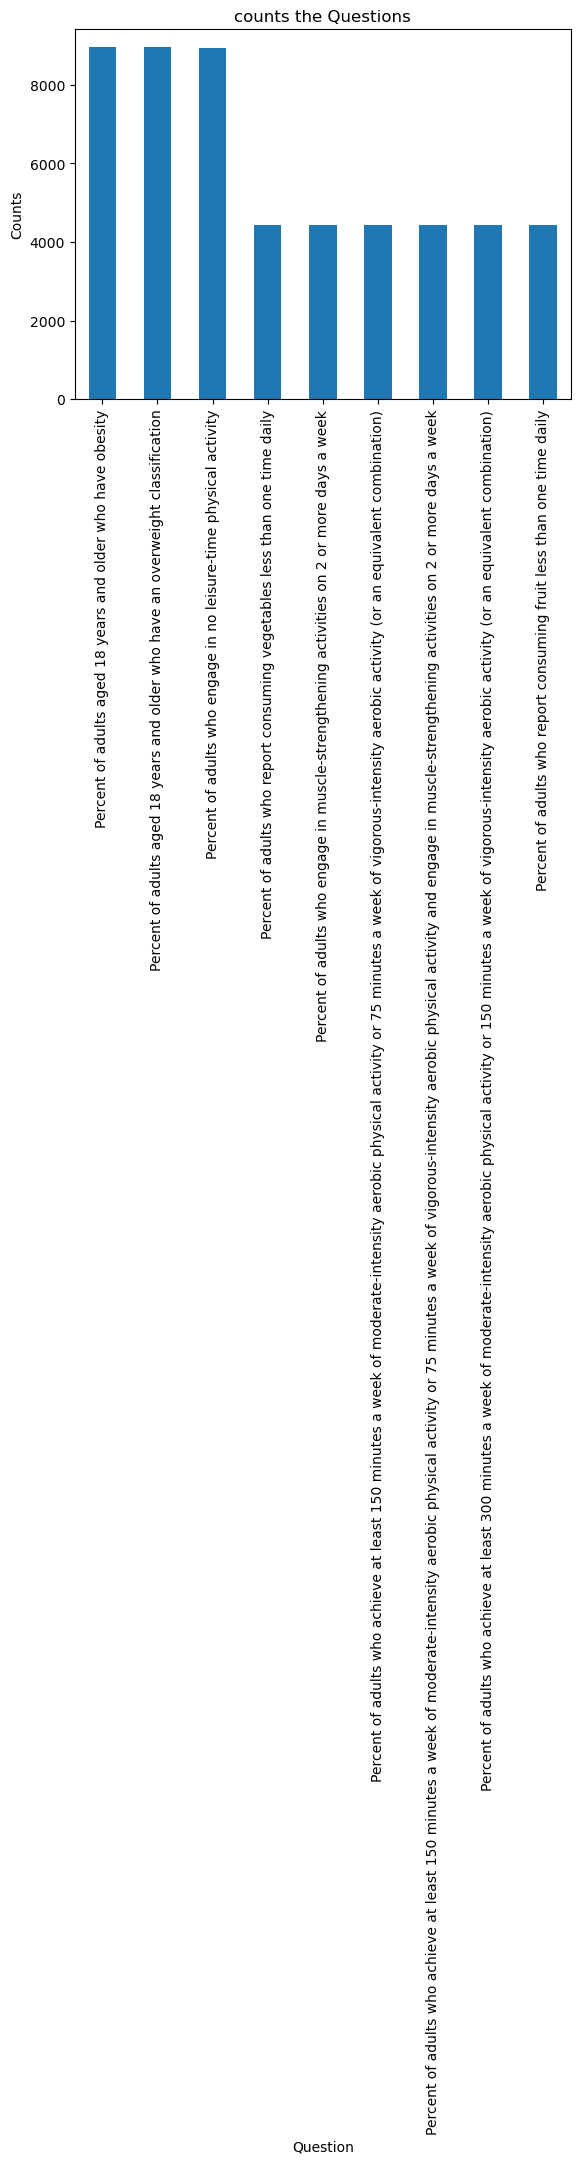

In [27]:
data['Question'].value_counts().plot(kind='bar')
plt.xlabel('Question')
plt.ylabel('Counts')
plt.title('counts the Questions')
plt.show()

In [28]:
Drop_val ='Physical Activity - Behavior'
filtered_data = data[data['Topic'] != Drop_val ]
unique_value = filtered_data['Topic'].nunique()
print(unique_value)


2


In [29]:
Drop_val ='Fruits and Vegetables - Behavior'
filtered_data_new =filtered_data[filtered_data['Topic'] != Drop_val ]
unique_value = filtered_data_new['Topic'].nunique()
print(unique_value)


1


In [30]:
filtered_data_new.columns


Index(['YearEnd', 'LocationDesc', 'Topic', 'Question', 'Data_Value',
       'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Sample_Size',
       'Age(years)', 'Education', 'Gender', 'Income', 'Race/Ethnicity'],
      dtype='object')

In [31]:
topic = filtered_data_new['Topic'].value_counts()
topic

Obesity / Weight Status    17920
Name: Topic, dtype: int64

In [32]:
import numpy as np
numeric_features=data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['YearEnd', 'Data_Value', 'Low_Confidence_Limit',
       'High_Confidence_Limit ', 'Sample_Size'],
      dtype='object')

In [33]:
categorical_features=data.select_dtypes(include=[np.object])
categorical_features.columns

C:\Users\DHARM\AppData\Local\Temp\ipykernel_25180\3131967267.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features=data.select_dtypes(include=[np.object])


Index(['LocationDesc', 'Topic', 'Question', 'Age(years)', 'Education',
       'Gender', 'Income', 'Race/Ethnicity'],
      dtype='object')

In [34]:
correlation= numeric_features.corr()
print(correlation['Low_Confidence_Limit'].sort_values(ascending=False),'\n')

Low_Confidence_Limit      1.000000
Data_Value                0.956605
High_Confidence_Limit     0.804783
Sample_Size               0.048949
YearEnd                  -0.006593
Name: Low_Confidence_Limit, dtype: float64 



In [35]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['LocationDesc', 'Topic', 'Question']

label_encoder = LabelEncoder()

for column in categorical_columns:
    filtered_data_new[column] = label_encoder.fit_transform(filtered_data_new[column])

filtered_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17920 entries, 0 to 51851
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YearEnd                 17920 non-null  int64  
 1   LocationDesc            17920 non-null  int32  
 2   Topic                   17920 non-null  int32  
 3   Question                17920 non-null  int32  
 4   Data_Value              16254 non-null  float64
 5   Low_Confidence_Limit    16254 non-null  float64
 6   High_Confidence_Limit   16254 non-null  float64
 7   Sample_Size             16254 non-null  float64
 8   Age(years)              3840 non-null   object 
 9   Education               2560 non-null   object 
 10  Gender                  1280 non-null   object 
 11  Income                  4480 non-null   object 
 12  Race/Ethnicity          5120 non-null   object 
dtypes: float64(4), int32(3), int64(1), object(5)
memory usage: 1.7+ MB


C:\Users\DHARM\AppData\Local\Temp\ipykernel_25180\1311345710.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_new[column] = label_encoder.fit_transform(filtered_data_new[column])


In [36]:
filtered_data_new = pd.get_dummies(filtered_data_new, columns=['Age(years)', 'Education','Gender','Income','Race/Ethnicity'], prefix=['Age(years)', 'Education','Gender','Income','Race\Ethnicity'])


In [37]:
filtered_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17920 entries, 0 to 51851
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   YearEnd                                       17920 non-null  int64  
 1   LocationDesc                                  17920 non-null  int32  
 2   Topic                                         17920 non-null  int32  
 3   Question                                      17920 non-null  int32  
 4   Data_Value                                    16254 non-null  float64
 5   Low_Confidence_Limit                          16254 non-null  float64
 6   High_Confidence_Limit                         16254 non-null  float64
 7   Sample_Size                                   16254 non-null  float64
 8   Age(years)_18 - 24                            17920 non-null  uint8  
 9   Age(years)_25 - 34                            17920 non-null 

In [38]:
filtered_data_new


,YearEnd,LocationDesc,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years)_18 - 24,Age(years)_25 - 34,...,Income_Data not reported,"Income_Less than $15,000",Race\Ethnicity_2 or more races,Race\Ethnicity_American Indian/Alaska Native,Race\Ethnicity_Asian,Race\Ethnicity_Hawaiian/Pacific Islander,Race\Ethnicity_Hispanic,Race\Ethnicity_Non-Hispanic Black,Race\Ethnicity_Non-Hispanic White,Race\Ethnicity_Other
0,2011,0,0,1,32.0,30.5,33.5,7304.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011,0,0,1,32.3,29.9,34.7,2581.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,0,0,1,31.8,30.0,33.6,4723.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011,0,0,1,33.6,29.9,37.6,1153.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2011,0,0,1,32.8,30.2,35.6,2402.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51847,2016,49,0,1,NaN,NaN,NaN,NaN,0,0,...,0,0,0,0,1,0,0,0,0,0
51848,2016,49,0,1,NaN,NaN,NaN,NaN,0,0,...,0,0,0,0,0,1,0,0,0,0
51849,2016,49,0,1,NaN,NaN,NaN,NaN,0,0,...,0,0,0,1,0,0,0,0,0,0
51850,2016,49,0,1,NaN,NaN,NaN,NaN,0,0,...,0,0,1,0,0,0,0,0,0,0


In [39]:
filtered_data_new.isnull().sum()

YearEnd                                            0
LocationDesc                                       0
Topic                                              0
Question                                           0
Data_Value                                      1666
Low_Confidence_Limit                            1666
High_Confidence_Limit                           1666
Sample_Size                                     1666
Age(years)_18 - 24                                 0
Age(years)_25 - 34                                 0
Age(years)_35 - 44                                 0
Age(years)_45 - 54                                 0
Age(years)_55 - 64                                 0
Age(years)_65 or older                             0
Education_College graduate                         0
Education_High school graduate                     0
Education_Less than high school                    0
Education_Some college or technical school         0
Gender_Female                                 

In [40]:
# Calculating Mean, Mode and Median for feature Data_Value_Alt and we can see that it has almost same mean and median values also it is bimodal.
# But mean > median > mode
# This means that the distribution is bit positvely skewed.
# So we can replace the missing values with median for this feature.
print("Mean", data['Data_Value'].mean())
print("Median", data['Data_Value'].median())
print("Mode", data['Data_Value'].mode())

Mean 31.15668100773583
Median 30.7
Mode 0    29.6
1    30.2
Name: Data_Value, dtype: float64


In [41]:
# Calculating Mean, Mode and Median for feature Low_Confidence_Limit and we can see that it has almost same mean, mode and median values.
# But here mode > mean
# This means that the distribution is bit negatively skewed.
# So we can replace the missing values with median for this feature.
print("Mean", data['Low_Confidence_Limit'].mean())
print("Median", data['Low_Confidence_Limit'].median())
print("Mode", data['Low_Confidence_Limit'].mode())

Mean 26.89222686468383
Median 26.45
Mode 0    27.6
Name: Low_Confidence_Limit, dtype: float64


In [42]:

print("Mean", data['Sample_Size'].mean())
print("Median", data['Sample_Size'].median())
print("Mode", data['Sample_Size'].mode())

Mean 3889.1928598022587
Median 1209.0
Mode 0    54.0
Name: Sample_Size, dtype: float64


In [43]:
print("Mean", data['High_Confidence_Limit '].mean())
print("Median", data['High_Confidence_Limit '].median())
print("Mode", data['High_Confidence_Limit '].mode())

Mean 35.98999710420706
Median 35.6
Mode 0    37.1
Name: High_Confidence_Limit , dtype: float64


In [44]:
columns_to_fillna = ['Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit ','Sample_Size']

for column in columns_to_fillna:
    if filtered_data_new[column].dtype == 'float64' or filtered_data_new[column].dtype == 'int64':
        mean_value = data[column].mean()
        filtered_data_new[column].fillna(mean_value, inplace=True)

In [45]:
filtered_data_new.isnull().sum()

YearEnd                                         0
LocationDesc                                    0
Topic                                           0
Question                                        0
Data_Value                                      0
Low_Confidence_Limit                            0
High_Confidence_Limit                           0
Sample_Size                                     0
Age(years)_18 - 24                              0
Age(years)_25 - 34                              0
Age(years)_35 - 44                              0
Age(years)_45 - 54                              0
Age(years)_55 - 64                              0
Age(years)_65 or older                          0
Education_College graduate                      0
Education_High school graduate                  0
Education_Less than high school                 0
Education_Some college or technical school      0
Gender_Female                                   0
Gender_Male                                     0


<function matplotlib.pyplot.show(close=None, block=None)>

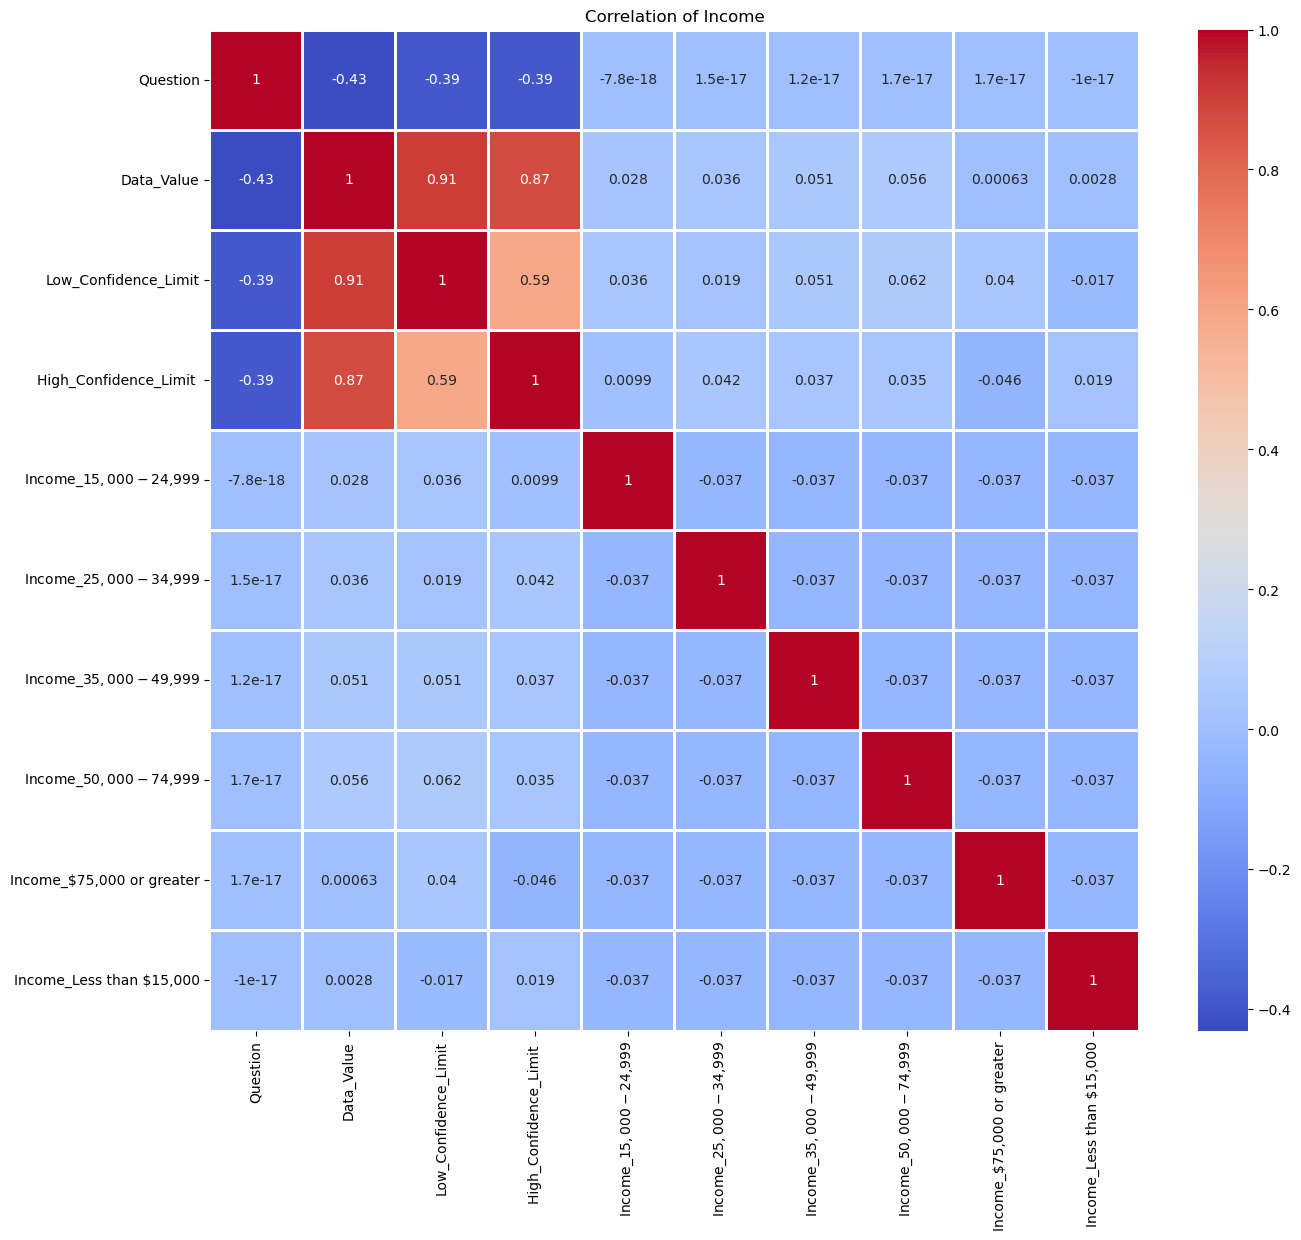

In [46]:
correlation_columns = [
  'Question',
    'Data_Value',
    'Low_Confidence_Limit',
    'High_Confidence_Limit ',
    'Income_$15,000 - $24,999',
    'Income_$25,000 - $34,999',
    'Income_$35,000 - $49,999',
    'Income_$50,000 - $74,999',
    'Income_$75,000 or greater',
    'Income_Less than $15,000'
]
correlation_matrix1 = filtered_data_new[correlation_columns].corr()
plt.figure(figsize=(15, 13))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', linewidths=0.8)
plt.title('Correlation of Income')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

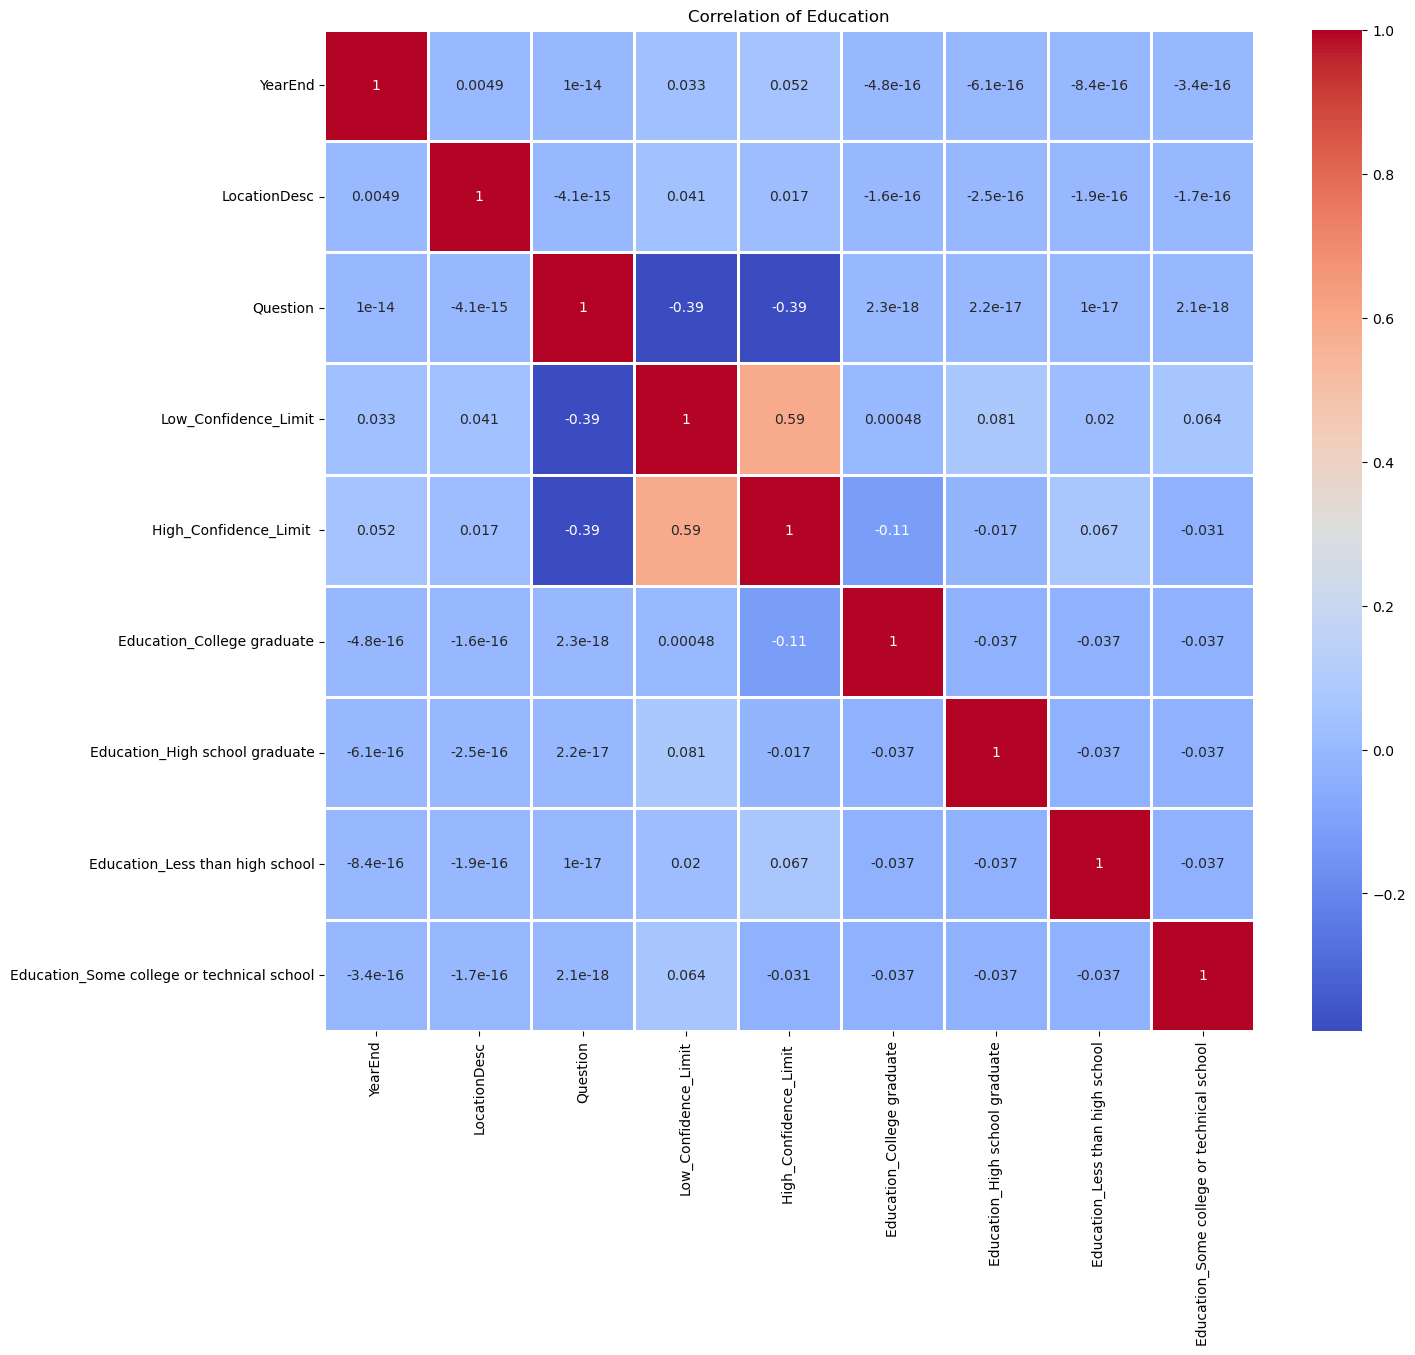

In [47]:
correlation_columns = [
 'YearEnd', 'LocationDesc', 'Question', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
            'Education_College graduate', 'Education_High school graduate','Education_Less than high school',
            'Education_Some college or technical school'
]
correlation_matrix1 = filtered_data_new[correlation_columns].corr()
plt.figure(figsize=(15, 13))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', linewidths=0.8)
plt.title('Correlation of Education')
plt.show

In [48]:
# TRAINING THE MODEL WITH THE Income PARAMETER

In [49]:
income_data = filtered_data_new[['YearEnd', 'LocationDesc', 'Topic', 'Question', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
            'Income_$15,000 - $24,999', 'Income_$25,000 - $34,999','Income_$35,000 - $49,999',
            'Income_$50,000 - $74,999', 'Income_$75,000 or greater', 'Income_Less than $15,000']]

income_data.head()

,YearEnd,LocationDesc,Topic,Question,Low_Confidence_Limit,High_Confidence_Limit,"Income_$15,000 - $24,999","Income_$25,000 - $34,999","Income_$35,000 - $49,999","Income_$50,000 - $74,999","Income_$75,000 or greater","Income_Less than $15,000"
0,2011,0,0,1,30.5,33.5,0,0,0,0,0,0
1,2011,0,0,1,29.9,34.7,0,0,0,0,0,0
2,2011,0,0,1,30.0,33.6,0,0,0,0,0,0
3,2011,0,0,1,29.9,37.6,0,0,0,0,0,0
4,2011,0,0,1,30.2,35.6,0,0,0,0,0,0


In [50]:
X_train, X_test, y_train, y_test =train_test_split(income_data, filtered_data_new["Data_Value"], random_state=42, test_size=0.20)

In [51]:
X_train

,YearEnd,LocationDesc,Topic,Question,Low_Confidence_Limit,High_Confidence_Limit,"Income_$15,000 - $24,999","Income_$25,000 - $34,999","Income_$35,000 - $49,999","Income_$50,000 - $74,999","Income_$75,000 or greater","Income_Less than $15,000"
27486,2013,42,0,0,32.0,41.4,1,0,0,0,0,0
47174,2015,26,0,1,20.6,42.0,0,0,0,0,0,0
24999,2011,38,0,0,32.6,35.8,0,0,0,0,0,0
48617,2015,28,0,1,28.2,29.0,0,0,0,0,0,0
14142,2014,21,0,1,20.8,29.1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
33520,2013,52,0,1,25.4,45.8,0,0,0,0,0,0
45896,2015,2,0,1,26.9,30.0,0,0,0,0,0,0
16145,2014,24,0,1,13.8,18.9,0,0,0,0,0,0
2628,2014,3,0,1,36.4,49.4,0,0,0,0,0,1


In [52]:
y_train

27486    36.6
47174    30.2
24999    34.2
48617    28.6
14142    24.7
         ... 
33520    34.9
45896    28.4
16145    16.2
2628     42.8
49727    29.6
Name: Data_Value, Length: 14336, dtype: float64

In [53]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)


In [54]:
X_train_scaled

array([[-0.31727913,  0.97798024,  0.        , ..., -0.19381028,
        -0.19361646, -0.19400392],
       [ 0.85305758, -0.03906778,  0.        , ..., -0.19381028,
        -0.19361646, -0.19400392],
       [-1.48761585,  0.72371824,  0.        , ..., -0.19381028,
        -0.19361646, -0.19400392],
       ...,
       [ 0.26788922, -0.16619878,  0.        , ..., -0.19381028,
        -0.19361646, -0.19400392],
       [ 0.26788922, -1.5010743 ,  0.        , ..., -0.19381028,
        -0.19361646,  5.15453497],
       [ 1.43822594,  0.46945623,  0.        , ..., -0.19381028,
        -0.19361646, -0.19400392]])

In [55]:
X_train_scaled.shape, X_test_scaled.shape

((14336, 12), (3584, 12))

In [56]:
poly_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('regressor', LinearRegression())
])

model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'PolynomialRegression': {"model": poly_regression, "params": {}}
}

In [57]:
def eval_models():
    models_result = pd.DataFrame()
    models_result['Train_RMSE'] = None
    models_result['Test_RMSE'] = None
    models_result['Train_MAE'] = None
    models_result['Test_MAE'] = None
    models_result['best_params'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, list(y_train))
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
        train_mae = mean_absolute_error(list(y_train), y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
        test_mae = mean_absolute_error(list(y_test), y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        models_result.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_model)
    # plot the prediction errors using the best model
    y_predicted = best_model.predict(X_test_scaled)
    plt.plot(list(y_test) - y_predicted, marker='o', linestyle='')

    return models_result

LinearRegression 0.2810846603769666 {}
PolynomialRegression 0.11397191316679266 {}
Best model:  Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('regressor', LinearRegression())])


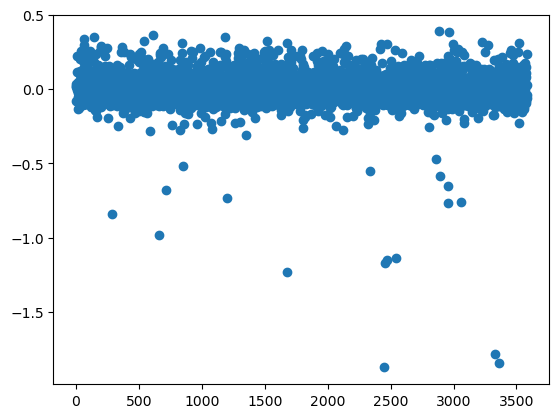

In [58]:
models_result = eval_models()

In [59]:
models_result

,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params
LinearRegression,0.281085,0.263077,0.157748,0.154568,{}
PolynomialRegression,0.113972,0.114778,0.068017,0.068645,{}


In [60]:
#TRAINING THE MODEL WITH THE Education PARAMETER

In [61]:
Education_data = filtered_data_new[['YearEnd', 'LocationDesc', 'Topic', 'Question', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
            'Education_College graduate', 'Education_High school graduate','Education_Less than high school',
            'Education_Some college or technical school']]

Education_data.head()

,YearEnd,LocationDesc,Topic,Question,Low_Confidence_Limit,High_Confidence_Limit,Education_College graduate,Education_High school graduate,Education_Less than high school,Education_Some college or technical school
0,2011,0,0,1,30.5,33.5,0,0,0,0
1,2011,0,0,1,29.9,34.7,0,0,0,0
2,2011,0,0,1,30.0,33.6,0,0,0,0
3,2011,0,0,1,29.9,37.6,0,0,1,0
4,2011,0,0,1,30.2,35.6,0,1,0,0


In [62]:
X_train, X_test, y_train, y_test = train_test_split(Education_data, filtered_data_new["Data_Value"], random_state=42, test_size=0.20)

In [63]:
X_train

,YearEnd,LocationDesc,Topic,Question,Low_Confidence_Limit,High_Confidence_Limit,Education_College graduate,Education_High school graduate,Education_Less than high school,Education_Some college or technical school
27486,2013,42,0,0,32.0,41.4,0,0,0,0
47174,2015,26,0,1,20.6,42.0,0,0,0,0
24999,2011,38,0,0,32.6,35.8,0,0,0,0
48617,2015,28,0,1,28.2,29.0,0,0,0,0
14142,2014,21,0,1,20.8,29.1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
33520,2013,52,0,1,25.4,45.8,0,0,0,0
45896,2015,2,0,1,26.9,30.0,0,0,0,0
16145,2014,24,0,1,13.8,18.9,0,0,0,0
2628,2014,3,0,1,36.4,49.4,0,0,0,0


In [64]:
y_train

27486    36.6
47174    30.2
24999    34.2
48617    28.6
14142    24.7
         ... 
33520    34.9
45896    28.4
16145    16.2
2628     42.8
49727    29.6
Name: Data_Value, Length: 14336, dtype: float64

In [65]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)


In [66]:
X_train_scaled

array([[-0.31727913,  0.97798024,  0.        , ..., -0.1941974 ,
        -0.19283955, -0.19361646],
       [ 0.85305758, -0.03906778,  0.        , ..., -0.1941974 ,
        -0.19283955, -0.19361646],
       [-1.48761585,  0.72371824,  0.        , ..., -0.1941974 ,
        -0.19283955, -0.19361646],
       ...,
       [ 0.26788922, -0.16619878,  0.        , ..., -0.1941974 ,
        -0.19283955, -0.19361646],
       [ 0.26788922, -1.5010743 ,  0.        , ..., -0.1941974 ,
        -0.19283955, -0.19361646],
       [ 1.43822594,  0.46945623,  0.        , ..., -0.1941974 ,
        -0.19283955, -0.19361646]])

In [67]:
X_test_scaled

array([[ 0.85305758, -0.92898479,  0.        , ..., -0.1941974 ,
        -0.19283955, -0.19361646],
       [ 0.85305758, -1.6917708 ,  0.        , ..., -0.1941974 ,
        -0.19283955, -0.19361646],
       [ 0.26788922,  0.85084924,  0.        , ..., -0.1941974 ,
        -0.19283955, -0.19361646],
       ...,
       [ 1.43822594,  1.23224224,  0.        , ..., -0.1941974 ,
        -0.19283955, -0.19361646],
       [ 1.43822594,  0.40589073,  0.        , ..., -0.1941974 ,
        -0.19283955, -0.19361646],
       [-1.48761585, -0.22976428,  0.        , ..., -0.1941974 ,
        -0.19283955, -0.19361646]])

In [68]:
X_train_scaled.shape, X_test_scaled.shape

((14336, 10), (3584, 10))

In [69]:
poly_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('regressor', LinearRegression())
])

model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'PolynomialRegression': {"model": poly_regression, "params": {}}
}

In [70]:
def eval_models():
    models_result = pd.DataFrame()
    models_result['Train_RMSE'] = None
    models_result['Test_RMSE'] = None
    models_result['Train_MAE'] = None
    models_result['Test_MAE'] = None
    models_result['best_params'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, list(y_train))
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
        train_mae = mean_absolute_error(list(y_train), y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
        test_mae = mean_absolute_error(list(y_test), y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        models_result.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_model)
    # plot the prediction errors using the best model
    y_predicted = best_model.predict(X_test_scaled)
    plt.plot(list(y_test) - y_predicted, marker='o', linestyle='')

    return models_result

LinearRegression 0.2822566741688807 {}
PolynomialRegression 0.11474665510279188 {}
Best model:  Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('regressor', LinearRegression())])


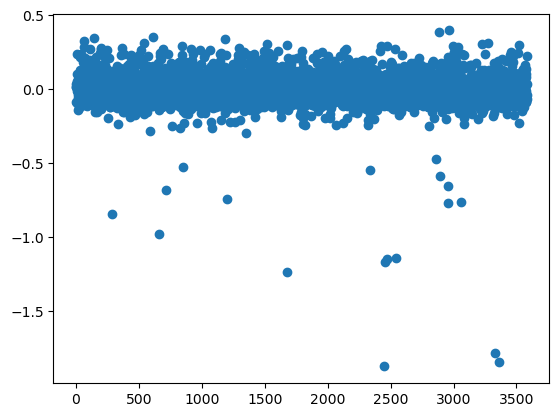

In [71]:
models_result = eval_models()

In [72]:
models_result

,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params
LinearRegression,0.282257,0.264337,0.160008,0.156375,{}
PolynomialRegression,0.114747,0.115685,0.06949,0.070326,{}
